# Extracting effectively domiciled area of census sectors

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [79]:
df = pd.read_csv('data/output/df_effectively_domiciled_area.csv')
df = df.dropna()
df = df.loc[df['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2']!=np.inf]

## Analysis

### Quantity

In [80]:
df[['municipality_id','CD_SETOR']].groupby('municipality_id').count().describe()

,CD_SETOR
count,5570.000000
mean,63.698923
std,457.642495
min,1.000000
25%,7.000000
50%,14.000000
75%,35.000000
max,27035.000000


### Mean

In [81]:
df.columns

Index(['CD_SETOR', 'v0001', 'DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2',
       'municipality_id', 'municipio', 'População residente (Pessoas)'],
      dtype='object')

In [82]:
df.groupby('municipality_id')['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].mean().describe()

count     5570.000000
mean      3327.570872
std       2526.734396
min        174.704894
25%       1776.639527
50%       2793.063236
75%       4097.822236
max      34978.456658
Name: DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2, dtype: float64

<Axes: >

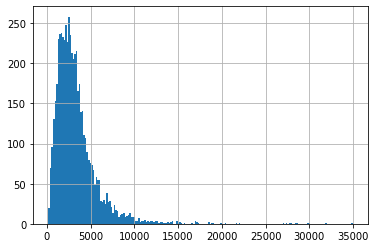

In [83]:
df.groupby('municipality_id')['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].mean().hist(bins=200)

### Median

In [84]:
df.groupby('municipality_id')['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].median().describe()

count     5570.000000
mean      2878.211402
std       2042.238601
min         91.500610
25%       1582.777979
50%       2445.051661
75%       3605.789132
max      25460.636516
Name: DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2, dtype: float64

<Axes: >

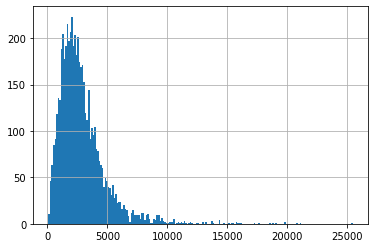

In [85]:
df.groupby('municipality_id')['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].median().hist(bins=200)

## Pareto analysis

In [86]:
df = df.sort_values(by='DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2', ascending=False)
df['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'] = df['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].round(2)

In [87]:
df_pareto = pd.DataFrame()

for municipality in df['municipio'].unique():
    df_municipality = df.loc[df['municipio'] == municipality].copy()
    total_municipality = len(df_municipality)
    pareto_20 = round(total_municipality * 0.20)
    df_municipality_pareto_20 = df_municipality.iloc[:pareto_20]
    population_municipality = df_municipality['População residente (Pessoas)'].max()
    population_pareto_20 = df_municipality_pareto_20['v0001'].sum()
    pareto_20_coverage = population_pareto_20 / population_municipality * 100
    pareto_20_median = df_municipality_pareto_20['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].median()
    municipality_id = df_municipality['municipality_id'].iloc[0]
    df_temp = pd.DataFrame({'municipality_id': [municipality_id], 'municipio': [municipality], 'pareto_20_coverage': [pareto_20_coverage], 'pareto_20_median': [pareto_20_median]})
    df_pareto = pd.concat([df_pareto, df_temp], ignore_index=True)


In [88]:
df_pareto

,municipality_id,municipio,pareto_20_coverage,pareto_20_median
0,330455,Rio de Janeiro (RJ),22.075698,60083.595
1,355030,São Paulo (SP),19.439126,62627.410
2,330100,Campos dos Goytacazes (RJ),22.173049,13159.160
3,230440,Fortaleza (CE),19.327264,32853.030
4,310620,Belo Horizonte (MG),20.263651,26920.890
...,...,...,...,...
5565,431164,Linha Nova (RS),0.000000,NaN
5566,430843,Forquetinha (RS),0.000000,NaN
5567,432183,Três Forquilhas (RS),0.000000,NaN
5568,430957,Herveiras (RS),0.000000,NaN


In [89]:
df_pareto['pareto_20_coverage'].describe()

count    5570.000000
mean       15.854333
std         7.468117
min         0.000000
25%        11.149259
50%        15.999243
75%        20.503824
max        64.960123
Name: pareto_20_coverage, dtype: float64

## Saving data

In [93]:
df_effectively_domiciled_area = df.groupby(['municipality_id','municipio'])['DENSIDADE_DEMOGRAFICA_DOMICILIADA_HAB_KM2'].median().reset_index()
df_effectively_domiciled_area.columns = ['municipality_id','municipality','density_median']

In [95]:
df_effectively_domiciled_area.to_csv('data/output/effectively_domiciled_area.csv', index=False)

In [96]:
df_effectively_domiciled_area

,municipality_id,municipality,density_median
0,110001,Alta Floresta D'Oeste (RO),1662.200
1,110002,Ariquemes (RO),3418.085
2,110003,Cabixi (RO),1566.770
3,110004,Cacoal (RO),2695.100
4,110005,Cerejeiras (RO),1956.175
...,...,...,...
5565,522200,Vianópolis (GO),2447.270
5566,522205,Vicentinópolis (GO),2861.455
5567,522220,Vila Boa (GO),2501.470
5568,522230,Vila Propício (GO),1646.865
